In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

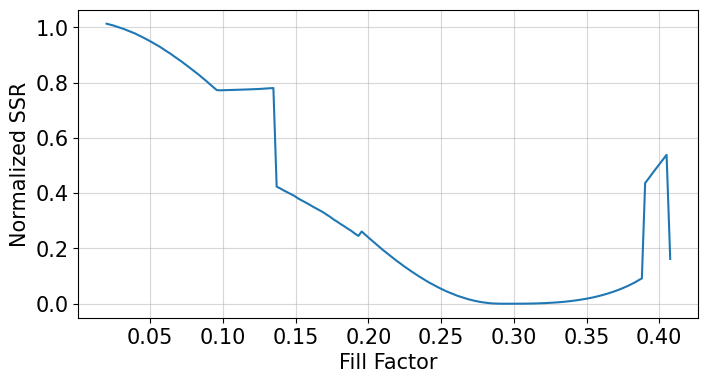

In [21]:
# Import data
SSR_list, ff_list = [], []
for file in Path("data").glob("SSR-ff-data-offset-*.txt"):
    SSR, ff = np.loadtxt(file)
    SSR_list.append(SSR)
    ff_list.append(ff)

# Convert to numpy arrays
SSR_list = np.array(SSR_list).flatten()
ff_list = np.array(ff_list).flatten()

# Sort data by fill factor
idx = np.argsort(ff_list)
SSR_list = SSR_list[idx]
ff_list = ff_list[idx]

# Plot data
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

ax.plot(ff_list, SSR_list, "-", ms=2)
ax.set_xlabel("Fill Factor", fontsize=fontsize)
ax.set_ylabel("Normalized SSR", fontsize=fontsize)
ax.grid(alpha=0.5)

In [22]:
# Define loss functions modifications to the residuals
def soft_l1(z):
    return 2 * (np.sqrt(1 + z**2) - 1)

def cauchy(z):
    return np.log(1 + z**2)

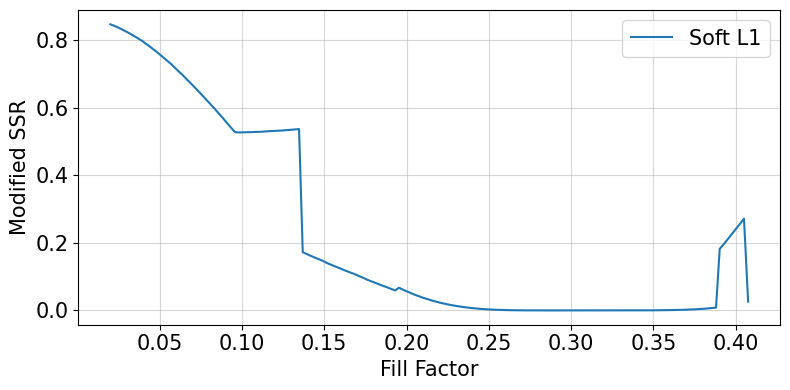

In [26]:
# Plot the different loss functions modifications

# Soft L1
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

ax.plot(ff_list, soft_l1(SSR_list), "-", ms=2, label="Soft L1")
ax.set_xlabel("Fill Factor", fontsize=fontsize)
ax.set_ylabel("Modified SSR", fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.grid(alpha=0.5)

fig.tight_layout()
fig.savefig("figures/soft-l1.png", dpi=300)
plt.show()

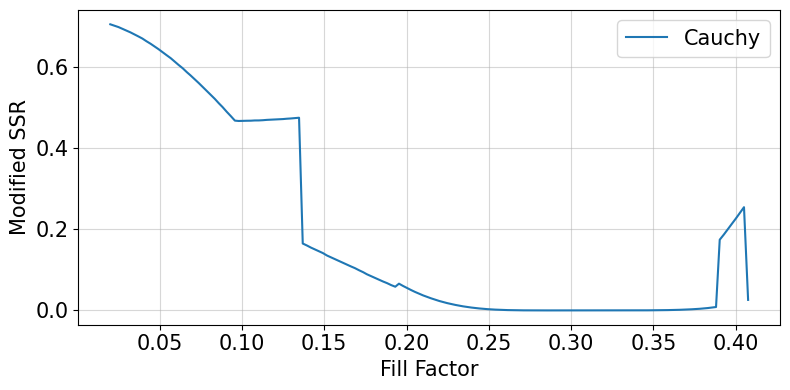

In [27]:
# Cauchy
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

ax.plot(ff_list, cauchy(SSR_list), "-", ms=2, label="Cauchy")
ax.set_xlabel("Fill Factor", fontsize=fontsize)
ax.set_ylabel("Modified SSR", fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.grid(alpha=0.5)

fig.tight_layout()
fig.savefig("figures/cauchy.png", dpi=300)
plt.show()

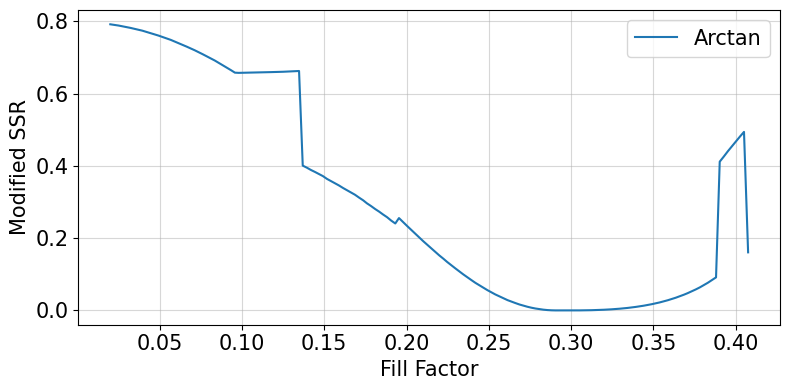

In [28]:
# Arctan
fontsize = 15
fig, ax = plt.subplots(figsize=(8, 4))
ax.tick_params(labelsize=fontsize)

ax.plot(ff_list, np.arctan(SSR_list), "-", ms=2, label="Arctan")
ax.set_xlabel("Fill Factor", fontsize=fontsize)
ax.set_ylabel("Modified SSR", fontsize=fontsize)
ax.legend(fontsize=fontsize)
ax.grid(alpha=0.5)

fig.tight_layout()
fig.savefig("figures/arctan.png", dpi=300)
plt.show()